<a href="https://colab.research.google.com/github/pmishra77276/Card-Classification/blob/main/Classification%20on%20time%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d gpiosenka/time-image-datasetclassification
import zipfile
zip_ref = zipfile.ZipFile('/content/time-image-datasetclassification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/gpiosenka/time-image-datasetclassification
License(s): CC0-1.0
100% 383M/383M [00:03<00:00, 98.0MB/s]
100% 383M/383M [00:03<00:00, 105MB/s] 


In [2]:
import pandas as pd
df=pd.read_csv('/content/clocks.csv')
df.head()

class index          filepaths labels data set
0            0   train/1-00/0.jpg   1_00    train
1            0   train/1-00/1.jpg   1_00    train
2            0  train/1-00/11.jpg   1_00    train
3            0  train/1-00/12.jpg   1_00    train
4            0  train/1-00/13.jpg   1_00    train

In [3]:
len(df.labels.unique())

144

In [4]:
train_df=df[df['data set']=='train']
test_df=df[df['data set']=='test']
valid_df=df[df['data set']=='valid']
test_df=pd.concat([test_df,valid_df])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagentrain=ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=0.1
)
testdatagen=ImageDataGenerator(
    rescale=1.0/255.0
)

In [6]:
train=datagentrain.flow_from_dataframe(
    train_df,
    directory='/content/',
    x_col='filepaths',
    y_col='labels',
    class_mode='sparse',
    target_size=(224,224),

)
test=testdatagen.flow_from_dataframe(
    test_df,
    directory='/content/',
    x_col='filepaths',
    y_col='labels',
    class_mode='sparse',
    target_size=(224,224),
)

Found 11520 validated image filenames belonging to 144 classes.
Found 2880 validated image filenames belonging to 144 classes.


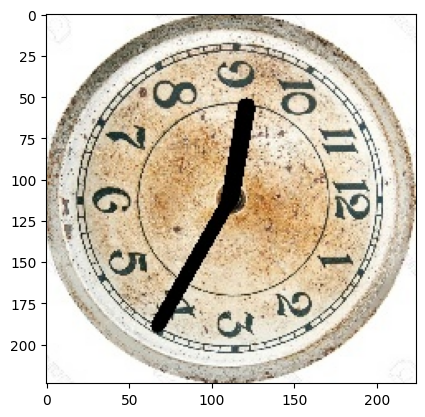

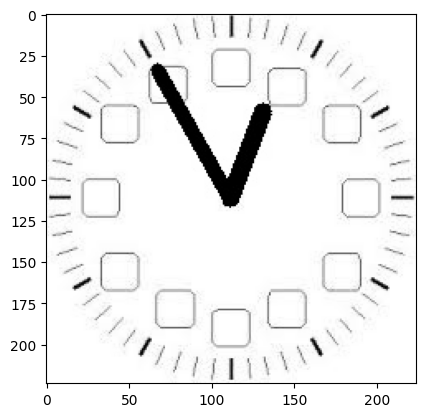

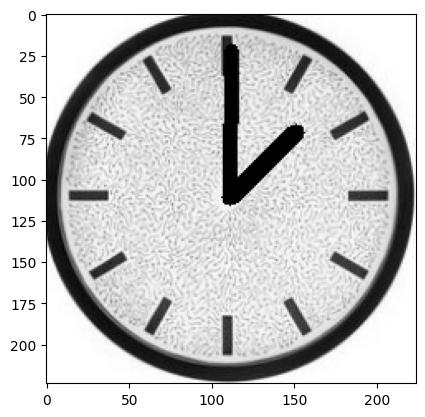

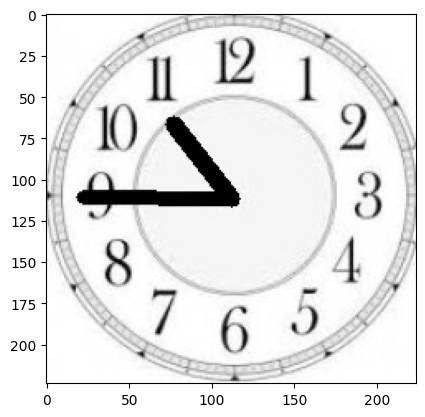

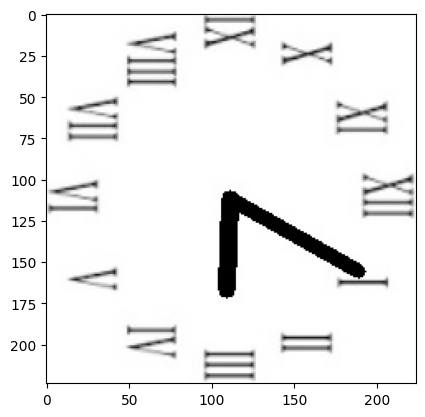

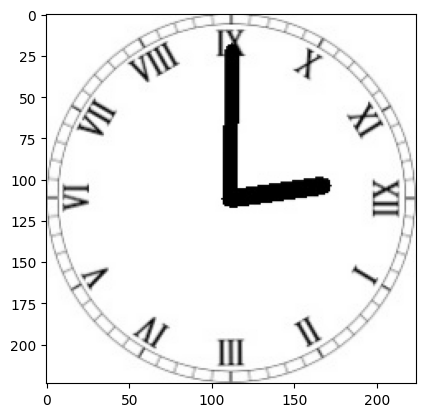

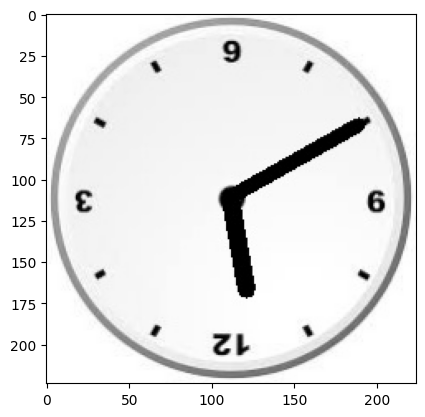

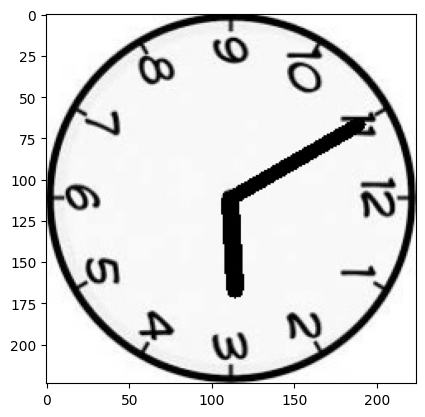

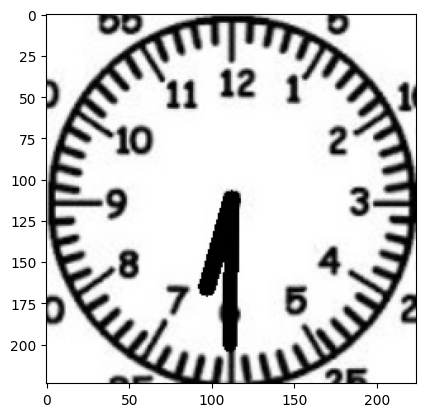

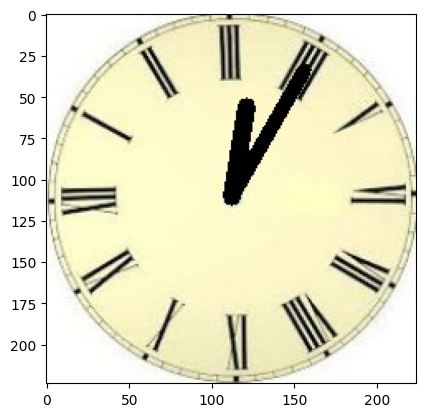

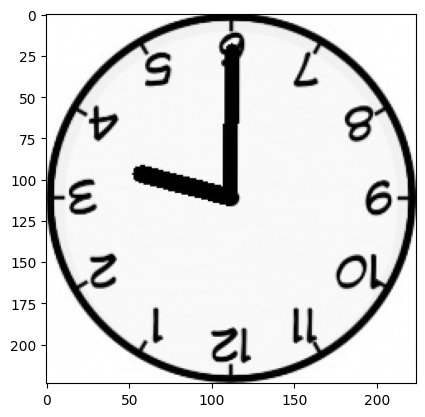

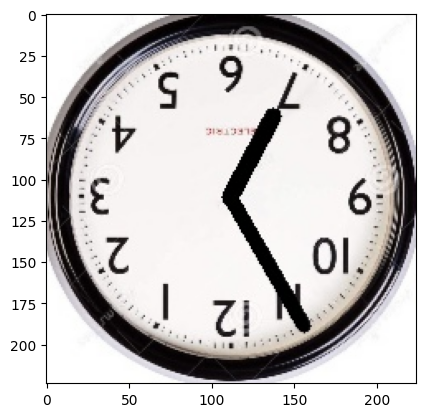

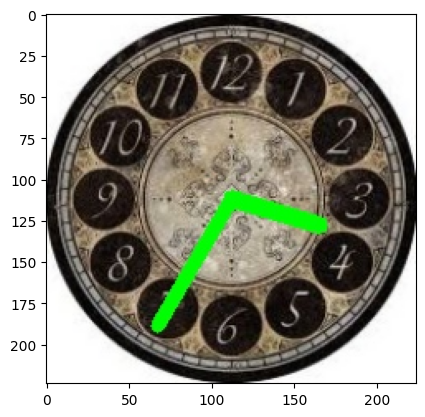

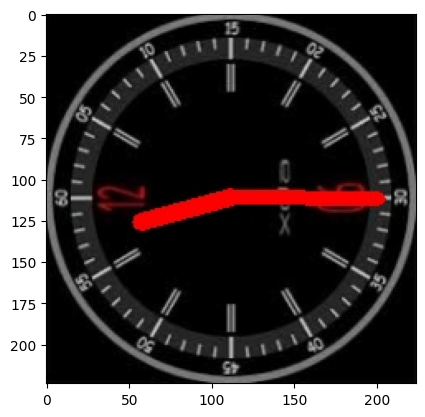

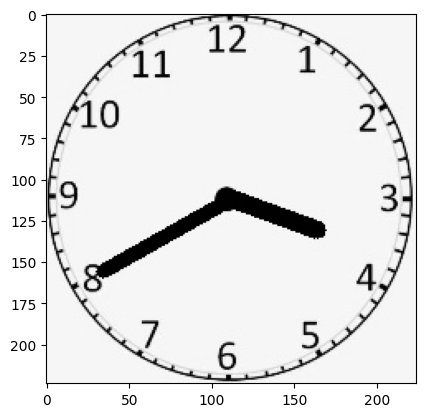

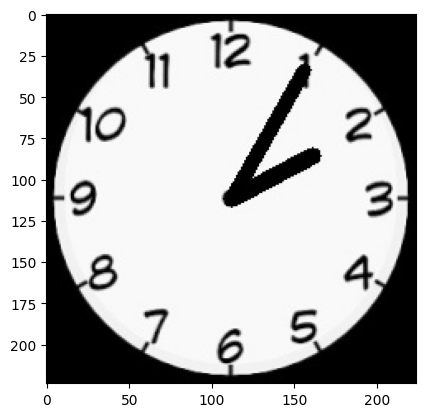

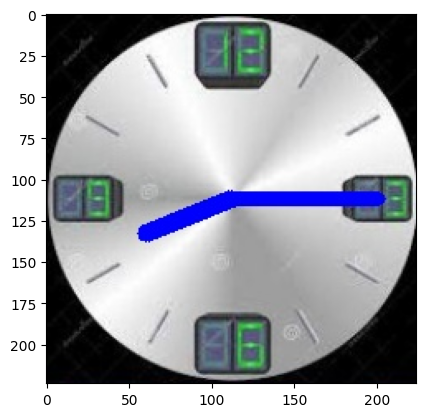

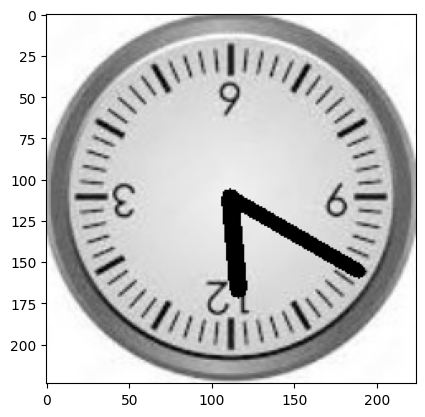

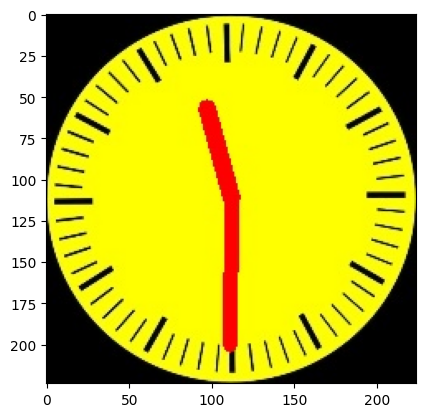

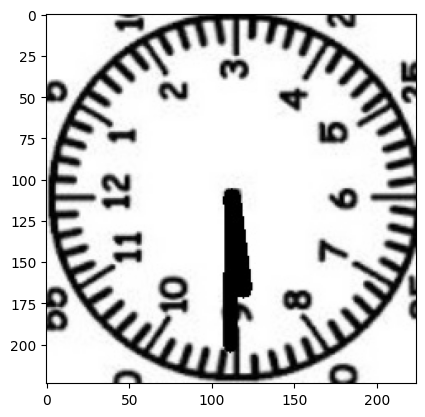

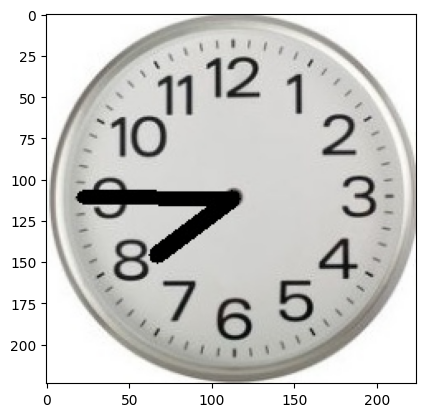

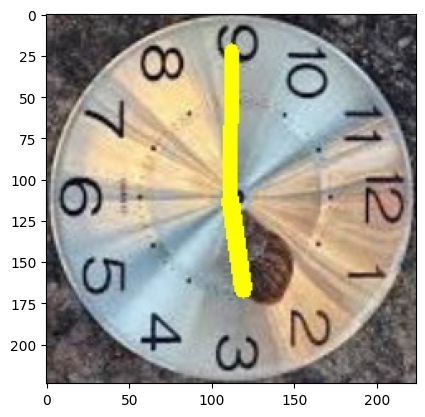

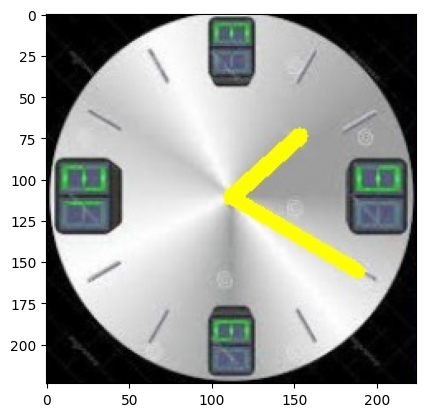

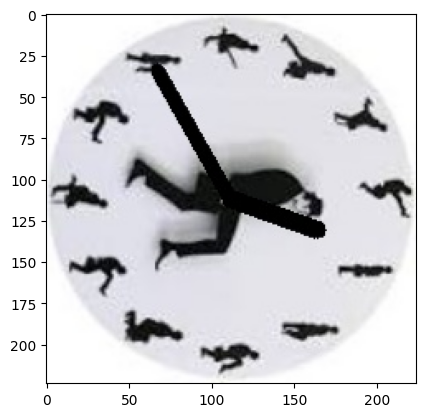

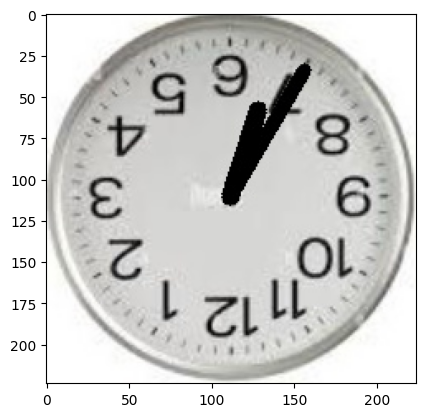

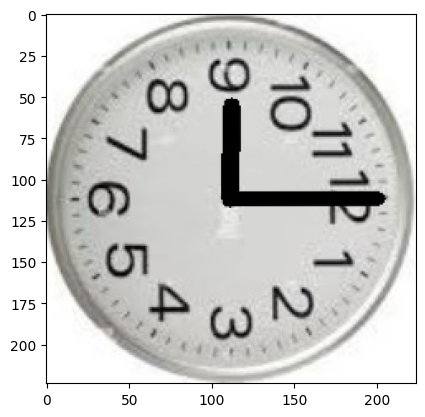

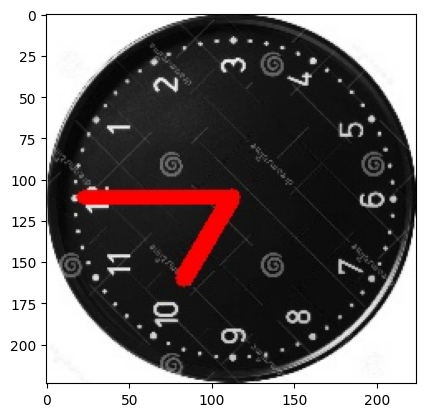

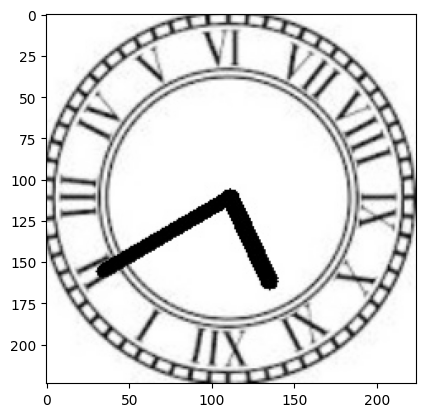

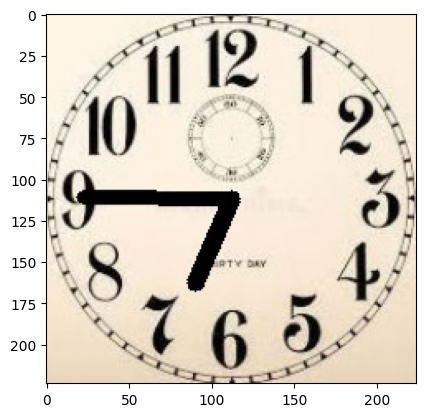

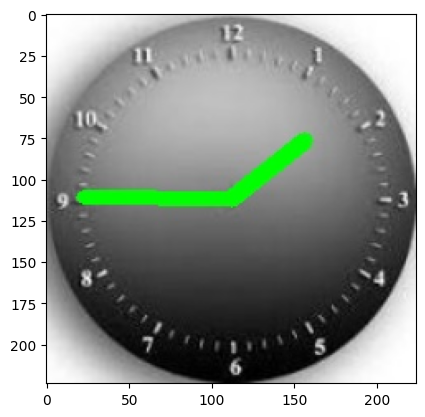

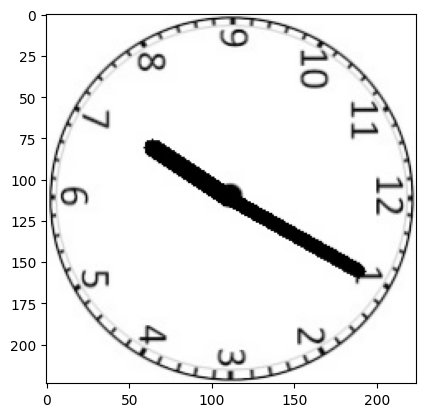

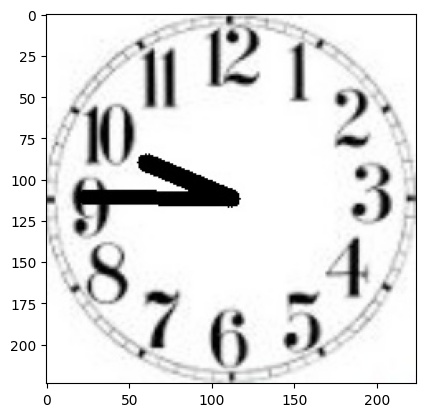

[136. 140. 114.   9.  61.  21.  20.  59. 102.  64.  66. 107.  67.  18.
  68.  49. 123.  22.  18. 129. 117.  57.  79.  32. 103. 132.   0.  14.
 105.  45. 109. 141.]


In [7]:
import matplotlib.pyplot as plt
for i,j in train:
  for k in i:
    plt.imshow(k)
    plt.show()
  print(j)
  break

# Model Building

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
conv_base=VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)
conv_base.summary(

)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
conv_base.set_trainable=False
trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    trainable=True
  if trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base.layers:
  print(layer.name,"  ",layer.trainable)

input_layer    False
block1_conv1    False
block1_conv2    False
block1_pool    False
block2_conv1    False
block2_conv2    False
block2_pool    False
block3_conv1    False
block3_conv2    False
block3_conv3    False
block3_pool    False
block4_conv1    False
block4_conv2    False
block4_conv3    False
block4_pool    False
block5_conv1    True
block5_conv2    True
block5_conv3    True
block5_pool    True


In [11]:
model=Sequential([
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(128,activation='relu',kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(128,activation='relu',kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(144,activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 25088)               │         100,352 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 144)                 │          18,576 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,062,544 (68.90 MB)

 Trainable params: 10,376,592 (39.58 MB)

 Non-trainable params: 7,685,952 (29.32 MB)

In [12]:
rms=RMSprop(learning_rate=0.0001)
model.compile(
    optimizer=rms,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
callback=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)
hist=model.fit(train,epochs=30,validation_data=test,callbacks=callback)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 185s 459ms/step - accuracy: 0.0730 - loss: 4.8482 - val_accuracy: 0.3635 - val_loss: 3.4016
Epoch 2/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 163s 451ms/step - accuracy: 0.5220 - loss: 2.6287 - val_accuracy: 0.6493 - val_loss: 1.7873
Epoch 3/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 203s 455ms/step - accuracy: 0.7384 - loss: 1.4967 - val_accuracy: 0.8076 - val_loss: 0.9728
Epoch 4/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 161s 448ms/step - accuracy: 0.8832 - loss: 0.8600 - val_accuracy: 0.8813 - val_loss: 0.5629
Epoch 5/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 162s 450ms/step - accuracy: 0.9570 - loss: 0.4536 - val_accuracy: 0.9389 - val_loss: 0.3309
Epoch 6/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 163s 454ms/step - accuracy: 0.9850 - loss: 0.2393 - val_accuracy: 0.9618 - val_loss: 0.1936
Epoch 7/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 163s 453ms/step - accuracy: 0.9937 - loss: 0.1277 - val_accuracy: 0.9681 - val_loss: 0.1534
Epoch 8/30
360/360 ━━━━━━━━━━━━━━━━━━━━ 164s 455ms/step - accuracy: 0.9969 -

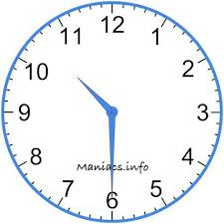

In [39]:
from PIL import Image
from IPython.display import display
img_path='/content/download.jpg'
img=Image.open(img_path)
img=img.resize((224,224))
img

In [40]:
import numpy as np
img=np.array(img).reshape(1,224,224,3)
pred=model.predict(img)
pred1=np.argmax(pred,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [41]:
for i,j in train.class_indices.items():
  if j==pred1:
    print(i)
    break

9_10


In [29]:
model.save("Time_model_99.h5")

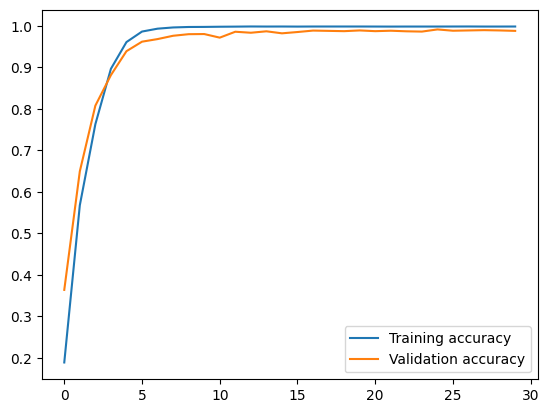

In [42]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='Training accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()

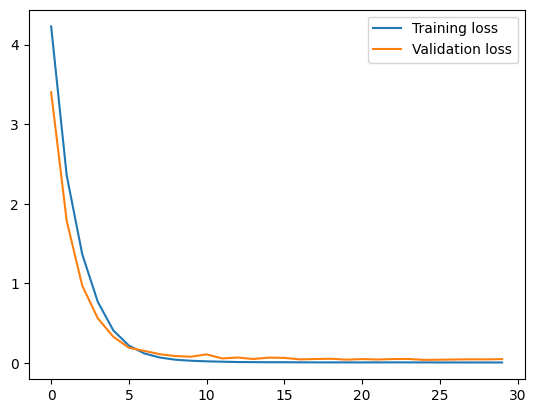

In [43]:
plt.plot(hist.history['loss'],label='Training loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

In [44]:
import plotly.express as px
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Line(y=hist.history['accuracy'],name='Training Accuracy'))
fig.add_trace(go.Line(y=hist.history['val_accuracy'],name='Validation Accuracy'))
fig.update_layout(
    title='Training vs Testing Accuracy',
    width=800
)
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [45]:
import plotly.express as px
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Line(y=hist.history['loss'],name='Training Loss'))
fig.add_trace(go.Line(y=hist.history['val_loss'],name='Validation Loss'))
fig.update_layout(
    title='Training vs Testing Loss',
    width=800
)
fig.show()